In [108]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

warnings.filterwarnings("ignore", category=FutureWarning)

In [109]:
df_survey = pd.read_csv('survey.csv', skiprows =2)
#survey_df.head()
#print(survey_df.columns)
# clean the data, remove the unecessary columns/rows 
df_survey = df_survey.dropna(axis = 1, how= "all") # drop columns with no values
columns_to_remove = [
    '{"ImportId":"startDate","timeZone":"America/Denver"}',
    '{"ImportId":"endDate","timeZone":"America/Denver"}',
    '{"ImportId":"status"}', '{"ImportId":"ipAddress"}',
    '{"ImportId":"progress"}', '{"ImportId":"duration"}',
    '{"ImportId":"recordedDate","timeZone":"America/Denver"}',
    '{"ImportId":"_recordId"}', '{"ImportId":"locationLatitude"}',
    '{"ImportId":"locationLongitude"}',
    '{"ImportId":"distributionChannel"}', 
    '{"ImportId":"userLanguage"}',
    '{"ImportId":"QID24_TEXT_793ea05a_cl6xuepgwd10Topics"}',
    '{"ImportId":"QID9_14_TEXT_793ea05a_2ihfdjzyz5rtTopics"}',
    '{"ImportId":"Q_UnansweredQuestions"}'
]

#rename columns
df_survey = df_survey.drop(columns=columns_to_remove)
df_survey = df_survey.rename(columns= {'{"ImportId":"finished"}': 'Finished', '{"ImportId":"Q_RecaptchaScore"}': 'Q_RecaptchaScore',
                                       '{"ImportId":"QID3"}': 'Participate', '{"ImportId":"QID4"}' : 'Age',
                                       '{"ImportId":"QID6"}' : 'Country of Residence',
                                       '{"ImportId":"QID7"}' : 'Level of Education',
                                       '{"ImportId":"QID8"}' : 'Living Area', '{"ImportId":"QID9"}' : 'Occupation',
                                       '{"ImportId":"QID9_14_TEXT"}' : 'Occupation : Other',
                                       '{"ImportId":"QID10"}' : 'General Awareness',
                                       '{"ImportId":"QID11"}': 'Seriousness of City Water Quality', 
                                       '{"ImportId":"QID12"}' : 'Awareness of city Management', 
                                       '{"ImportId":"QID13"}' : 'Ppl with no Drinking Water 2023',
                                        '{"ImportId":"QID14"}': 'Causes of Poor Water Quality', 
                                        '{"ImportId":"QID15_1"}' : 'Agriculture',
                                        '{"ImportId":"QID15_2"}': 'Global Warming', '{"ImportId":"QID15_3"}' : 'Industrial Waste',
                                        '{"ImportId":"QID15_4"}': 'Marine Dumping of Garbage', '{"ImportId":"QID15_5"}': 'Oil Leaks and Spills',
                                        '{"ImportId":"QID15_6"}': 'Sewage and Wastewater', '{"ImportId":"QID16"}': 'Attention given to Water on the News',
                                        '{"ImportId":"QID17"}': 'Source of Awareness', '{"ImportId":"QID18"}': 'Know of Urban Aquatic Ecosystem',
                                        '{"ImportId":"QID20_1"}': 'Interest in Water Quality Management', '{"ImportId":"QID21"}': 'Participated in Water Conservation Actitivites',
                                        '{"ImportId":"QID22"}': 'Interest in Learning More', '{"ImportId":"QID23"}': 'Interest in Learning more about City',
                                        '{"ImportId":"QID24_TEXT"}': 'What would you want to learn about', '{"ImportId":"QID25_1"}': 'Likelihood in using digital platform',
                                        '{"ImportId":"QID26"}': 'Features of Platform', '{"ImportId":"QID27"}': 'Interested in Contributing to Platform', '{"ImportId":"QID28"}': 'Interest in joining Community',
                                        '{"ImportId":"QID29"}': 'Motivations to engage with environmental causes',
                                        '{"ImportId":"Q_UnansweredPercentage"}': 'Unanswered Percentage',
                                       })


# remove unwanted rows (age, participation, robots, unanswered questions)
df_survey = df_survey.drop(df_survey[df_survey['Participate'] == 'No'].index)
df_survey = df_survey.drop(df_survey[df_survey['Age'] == 'Under 16'].index)
df_survey = df_survey.drop(df_survey[df_survey['Q_RecaptchaScore'].fillna(0) <= 0.5].index)
df_survey = df_survey.drop(df_survey[df_survey['Unanswered Percentage'] >= 0.5].index)


# combine occupation columns 
df_survey['Occupation'] = df_survey.apply(lambda row: row['Occupation : Other'] if row['Occupation'] == 'Other, please specify...' else row['Occupation'], axis = 1)
df_survey.drop(columns =['Occupation : Other'], inplace = True)


display(df_survey.head())
df_survey.to_csv("cleaned_survey.csv", index=False)


,Finished,Q_RecaptchaScore,Participate,Age,Country of Residence,Level of Education,Living Area,Occupation,General Awareness,Seriousness of City Water Quality,Awareness of city Management,Ppl with no Drinking Water 2023,Causes of Poor Water Quality,Agriculture,Global Warming,Industrial Waste,Marine Dumping of Garbage,Oil Leaks and Spills,Sewage and Wastewater,Attention given to Water on the News,Source of Awareness,Know of Urban Aquatic Ecosystem,Interest in Water Quality Management,Participated in Water Conservation Actitivites,Interest in Learning More,Interest in Learning more about City,What would you want to learn about,Likelihood in using digital platform,Features of Platform,Interested in Contributing to Platform,Interest in joining Community,Motivations to engage with environmental causes,Unanswered Percentage
1,True,0.9,Yes,18 - 24,Netherlands,Bachelor’s degree,Rural,Student,Somewhat knowledgeable,Somewhat serious,"Yes, I am partially aware (of the state of the...",2.2 billion,It can lead to waterborne disease such as chol...,1.0,3.0,4.0,6.0,2.0,5.0,Somewhat,"Social media,News websites,Word of mouth",Yes,61.0,Yes,Maybe,"Yes, definitely",NaN,6.0,"Educational information,Visualisations of up-t...",Maybe,Maybe,Local impact,0.076923
2,True,0.9,Yes,18 - 24,Italy,Master’s degree or higher,Suburban,Tourism and Hospitality,Neutral,Somewhat serious,"Yes, I am slightly aware.",2.2 billion,It can lead to waterborne disease such as chol...,2.0,3.0,1.0,5.0,6.0,4.0,Somewhat,"Social media,TV/radio",No,5.0,No,Maybe,Maybe,NaN,4.0,"Educational information,Forums for public disc...",Yes,Yes,"Health and Safety,Local impact",0.076923
3,True,1.0,Yes,18 - 24,Netherlands,Bachelor’s degree,Urban,Student,Neutral,Neutral/ Unsure,"Yes, I am partially aware (of the state of the...",1.5 billion,It can lead to waterborne disease such as chol...,2.0,6.0,5.0,4.0,3.0,1.0,Very little,"Social media,News websites,Word of mouth,Educa...",No,6.0,No,Maybe,Maybe,NaN,1.0,"Interactive maps,Educational information,Visua...",No,No,Global Climate Change,0.076923
4,True,1.0,Yes,18 - 24,Netherlands,Bachelor’s degree,Urban,Education,Not very knowledgeable,Somewhat serious,"Yes, I am slightly aware.",2.2 billion,It can lead to waterborne disease such as chol...,2.0,3.0,1.0,6.0,4.0,5.0,Somewhat,"Social media,News websites,Word of mouth,Educa...",No,6.0,No,Yes,"Yes, definitely",What impacts it has on nature and biodiversity...,10.0,Visualizations of up-to-date water quality dat...,Maybe,Maybe,"Concern for future generations,Health and Safe...",0.038462
5,True,0.9,Yes,18 - 24,Netherlands,Bachelor’s degree,Urban,Student,Somewhat knowledgeable,Somewhat serious,"Yes, I am partially aware (of the state of the...",3.6 billion,It can lead to waterborne disease such as chol...,1.0,2.0,4.0,5.0,6.0,3.0,Very little,"Word of mouth,Educational platforms",No,7.0,Yes,Yes,"Yes, definitely",NaN,6.0,"Interactive maps,Visualizations of up-to-date ...",Maybe,Maybe,"Health and Safety,Local impact",0.076923


In [110]:
pd.set_option("display.max_rows", None, "display.max_columns", None)


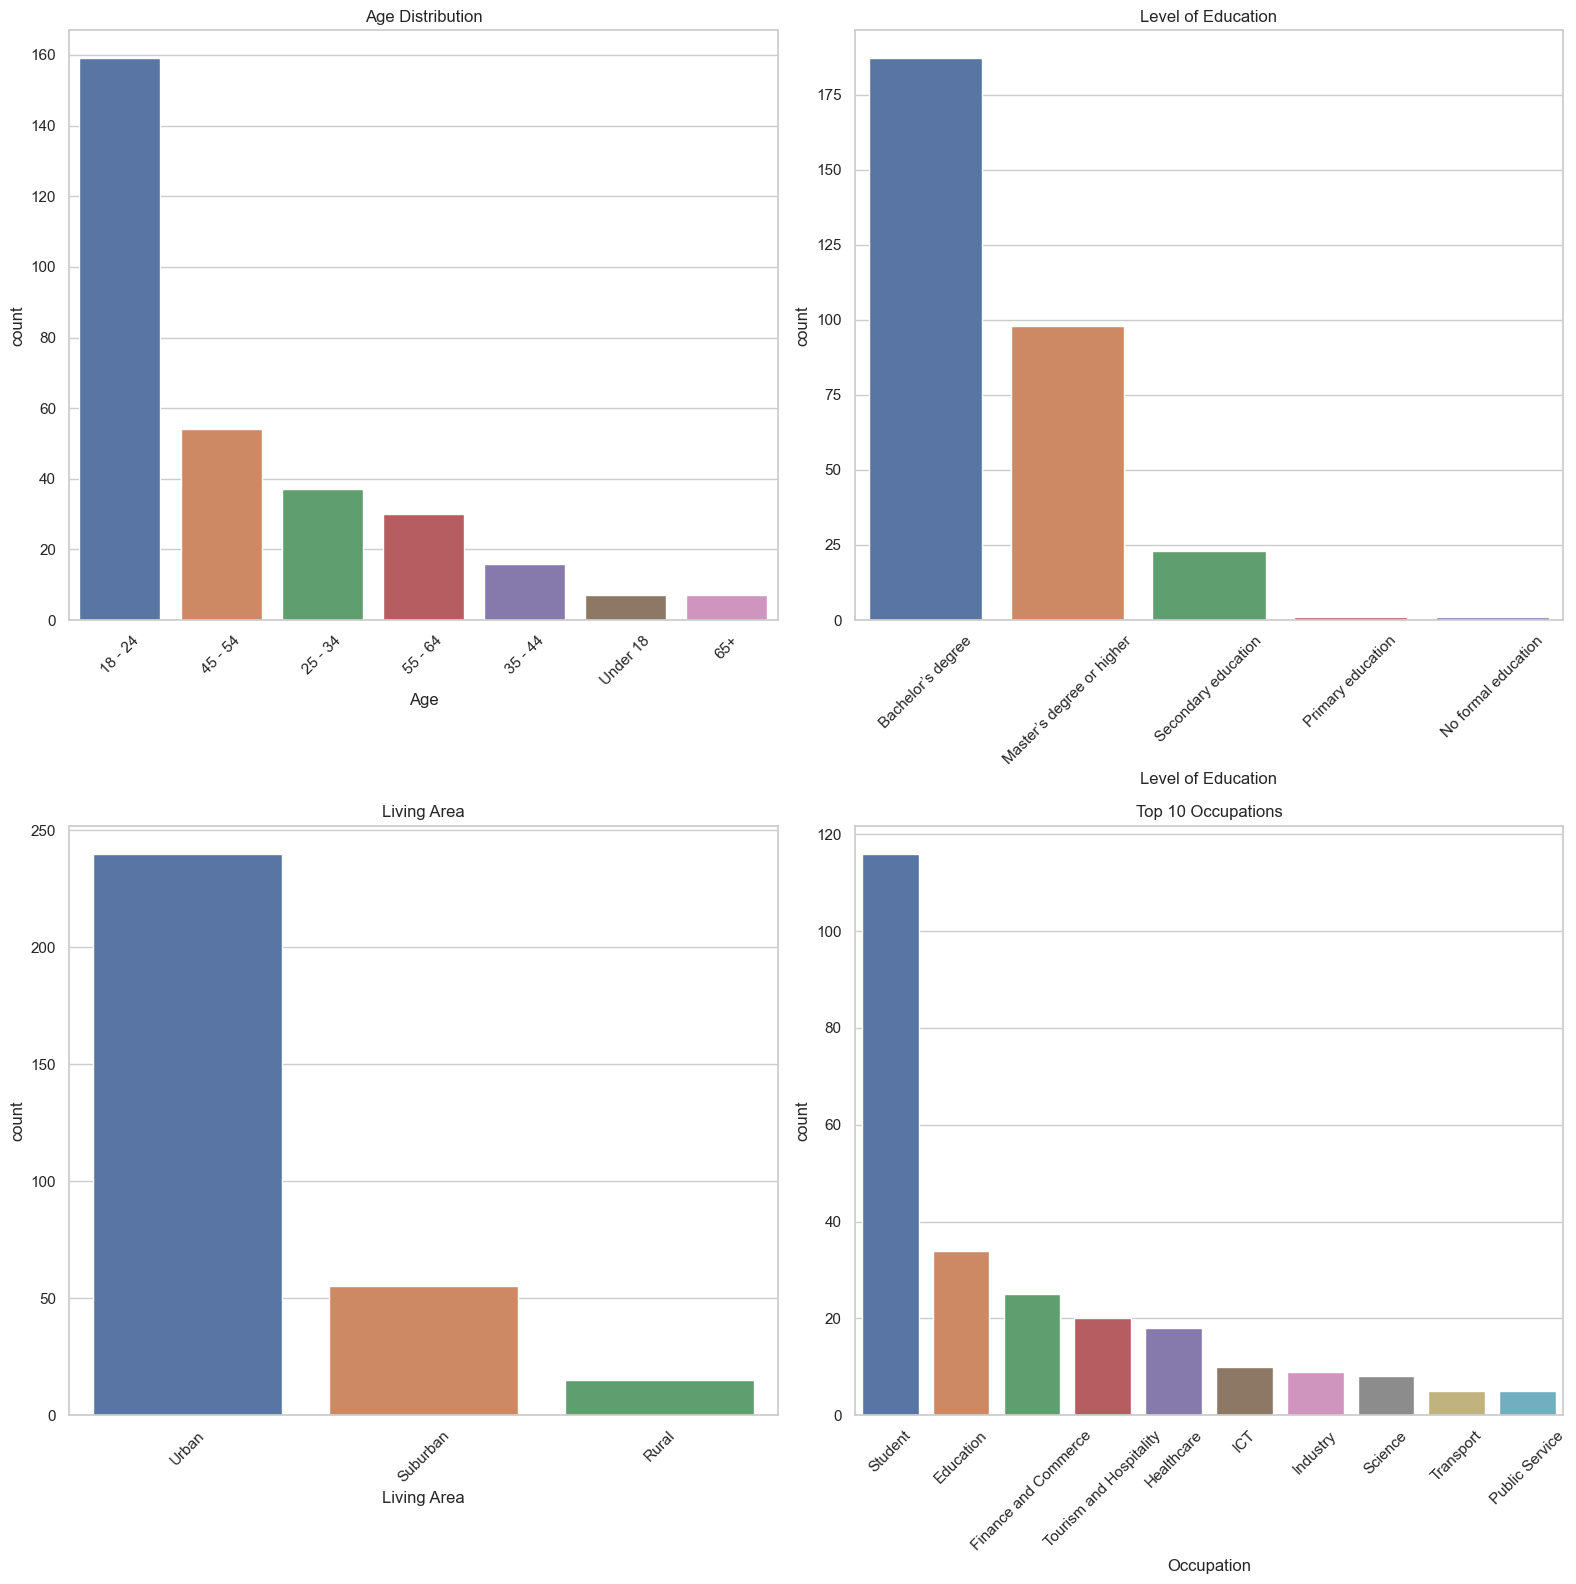

In [111]:
#demographics
survey_df = pd.read_csv('cleaned_survey.csv')
# Set visual style
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(16, 16))

#plot age distribution
sns.countplot(data=survey_df, x='Age', order=survey_df['Age'].value_counts().index, ax=axs[0, 0])
axs[0, 0].set_title("Age Distribution")
axs[0, 0].tick_params(axis='x', labelrotation=45)


# plot education distribution
sns.countplot(data=survey_df, x='Level of Education', order=survey_df['Level of Education'].value_counts().index, ax=axs[0, 1])
axs[0, 1].set_title("Level of Education")
axs[0, 1].tick_params(axis='x', labelrotation=45)

#plot living area 
sns.countplot(data=survey_df, x='Living Area', order=survey_df['Living Area'].value_counts().index, ax=axs[1, 0])
axs[1, 0].set_title("Living Area")
axs[1, 0].tick_params(axis='x', labelrotation=45)

#Plot occupation
top_occupations = survey_df['Occupation'].value_counts().nlargest(10).index
sns.countplot(data=survey_df[survey_df['Occupation'].isin(top_occupations)], x='Occupation', order=top_occupations, ax=axs[1, 1])
axs[1, 1].set_title("Top 10 Occupations")
axs[1, 1].tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.savefig("demographics.png", dpi=300)
plt.show()


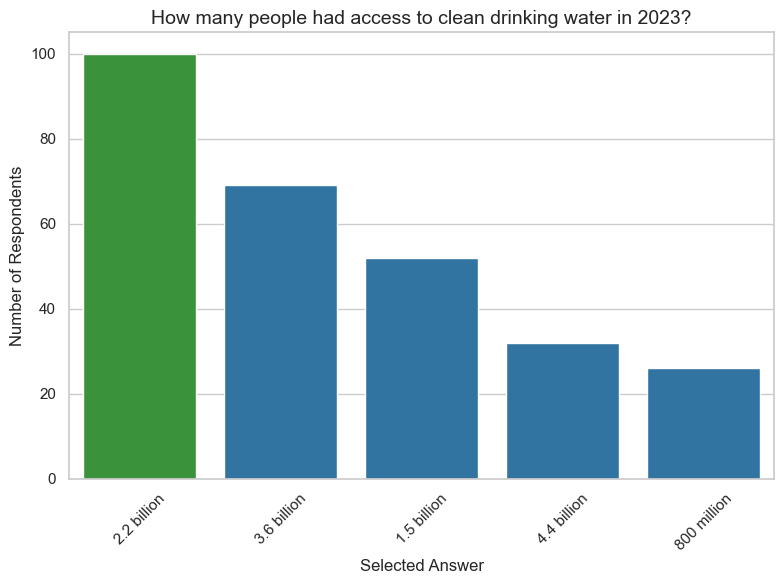

In [116]:
# Factual Questions
plt.figure(figsize=(8, 6))
water_counts = survey_df['Ppl with no Drinking Water 2023'].value_counts().sort_values(ascending=False)

bar_colors = ['#1f77b4' if answer != '2.2 billion' else '#2ca02c' for answer in water_counts.index]
sns.barplot(x=water_counts.index, y=water_counts.values, palette = bar_colors)

plt.title("How many people had access to clean drinking water in 2023?", fontsize=14)
plt.xlabel("Selected Answer", fontsize=12)
plt.ylabel("Number of Respondents", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Access_to_drinking_water.png", dpi=300)
plt.show()


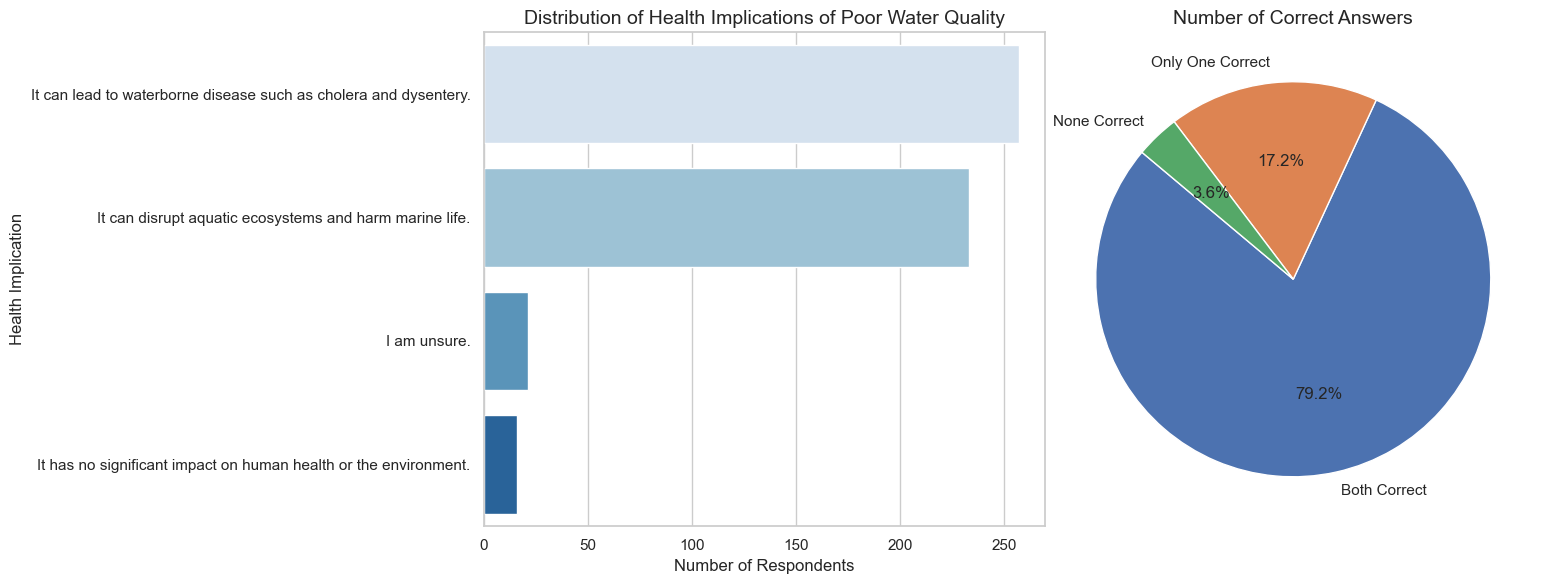

In [117]:
# Water Quality can cause ...
causes_col = survey_df['Causes of Poor Water Quality'].dropna()

correct_1 = 'It can lead to waterborne disease such as cholera and dysentery.'
correct_2 = 'It can disrupt aquatic ecosystems and harm marine life.'

# Identifying categories
both = causes_col.str.contains(correct_1, case=False) & causes_col.str.contains(correct_2, case=False)
only_one = causes_col.str.contains(correct_1, case=False) ^ causes_col.str.contains(correct_2, case=False)
none = ~(causes_col.str.contains(correct_1, case=False) | causes_col.str.contains(correct_2, case=False))

# Count the categories
labels = ['Both Correct', 'Only One Correct', 'None Correct']
sizes = [both.sum(), only_one.sum(), none.sum()]
#colors = ['#2ca02c', '#ff7f0e', '#d62728']

all_responses = ' '.join(survey_df['Causes of Poor Water Quality'].dropna())  # Combine all responses into one text string

possible_causes = [
    "It can lead to waterborne disease such as cholera and dysentery.",
    "It can disrupt aquatic ecosystems and harm marine life.",
    "It has no significant impact on human health or the environment.",
    "I am unsure."
]

cause_counts = Counter()
for cause in possible_causes:
    cause_counts[cause] = all_responses.count(cause)

cause_df = pd.DataFrame(list(cause_counts.items()), columns=['Cause', 'Count'])
cause_df = cause_df.sort_values(by='Count', ascending=False)

#plot it
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# First chart: Bar Chart for response distribution
sns.barplot(x='Count', y='Cause', data=cause_df, palette='Blues', ax=axes[0])
axes[0].set_title("Distribution of Health Implications of Poor Water Quality", fontsize=14)
axes[0].set_xlabel("Number of Respondents")
axes[0].set_ylabel("Health Implication")

# Second chart: Pie Chart for correctness categories
axes[1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
axes[1].set_title("Number of Correct Answers", fontsize=14)

plt.tight_layout()
plt.savefig("Poor_Water_quality_can_Cause.png", dpi=300)
plt.show()


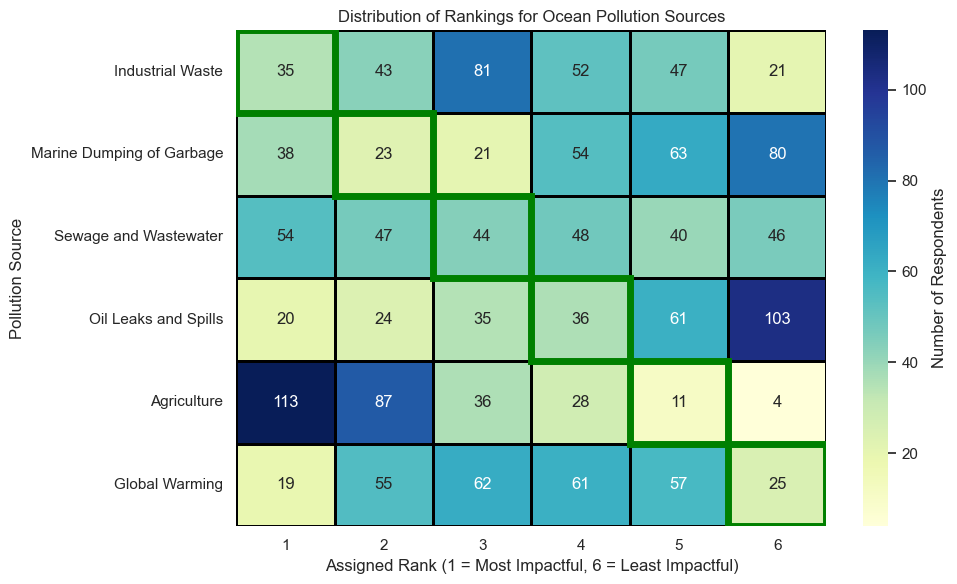

Number of respondents who got the order right: 0


In [118]:
#Question 3: causes of poor marine quality
#columns and also the correct order of answers
ranking_cols = [ 'Industrial Waste', 'Marine Dumping of Garbage', 'Sewage and Wastewater', 'Oil Leaks and Spills', 'Agriculture', 'Global Warming']
correct_order = {1: 'Industrial Waste', 2: 'Marine Dumping of Garbage', 3: 'Sewage and Wastewater', 4: 'Oil Leaks and Spills',  5: 'Agriculture', 6: 'Global Warming'}
heatmap_data = pd.DataFrame(index=ranking_cols, columns=range(1, 7))

# Count how often each rank was given to each 
for col in ranking_cols:
    rank_counts = survey_df[col].value_counts()
    for rank in range(1, 7):
        heatmap_data.loc[col, rank] = rank_counts.get(rank, 0)

#plot it
heatmap_data = heatmap_data.astype(int)
plt.figure(figsize=(10, 6))
ax = sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Number of Respondents'},linewidths=1, linecolor='black')

# outline the correct oder
for rank, pollution in correct_order.items():
    ax.add_patch(plt.Rectangle((rank - 1, ranking_cols.index(pollution)), 1, 1,fill=False, edgecolor='green', lw=5))

plt.title("Distribution of Rankings for Ocean Pollution Sources")
plt.xlabel("Assigned Rank (1 = Most Impactful, 6 = Least Impactful)")
plt.ylabel("Pollution Source")
plt.tight_layout()
plt.savefig("pollution_rank_heatmap.png", dpi=300)
plt.show()


# Check how many respondents got the correct order
correct_count = 0
partial_correct_count =  0
for _, row in survey_df.iterrows():
    # Create a list of the respondent's rankings based on the columns
    respondent_order = [row[col] for col in ranking_cols]
    
    
    # Compare the respondent's order to the correct order
    if respondent_order == [1.0,2.0,3.0,4.0,5.0,6.0]:
        correct_count += 1
     
print(f"Number of respondents who got the order right: {correct_count}")